# Task Overview
- Answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

# Import Libraries

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot formatting
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Load Data

In [2]:
import glob
q = "Data/Chicago/*.csv"
chunked_files = sorted(glob.glob(q))
# Show up to first 30 files
chunked_files[:30]

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [3]:
## Loading all files as df and appending to a list
df_list = []
for file in chunked_files:
    temp_df = pd.read_csv(file, index_col=0, lineterminator='\n')
    df_list.append(temp_df)
    
## Concatenating the list of dfs into 1 combined
df = pd.concat(df_list)
df.head(2)

Date   Primary Type              Description  \
ID                                                                        
1310586  01/01/2001 01:00:00 AM          THEFT           $500 AND UNDER   
1323184  01/01/2001 01:00:00 PM  OTHER OFFENSE  HARASSMENT BY TELEPHONE   

        Location Description  Arrest  Domestic  Beat  District  Ward  \
ID                                                                     
1310586               STREET   False     False   911       9.0   NaN   
1323184            RESIDENCE   False     False  2213      22.0   NaN   

          Latitude  Longitude  
ID                             
1310586  41.798298 -87.692856  
1323184  41.707671 -87.666996

# Inspect Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310586 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


## Check for Duplicates

In [5]:
df.duplicated().sum()

19680

In [6]:
# drop duplicates
df = df.drop_duplicates()

In [7]:
#check for duplicates again
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7835722 entries, 1310586 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 612.8+ MB


## Check for missing values

In [9]:
df.isna().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description     10801
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    613244
Latitude                 87890
Longitude                87890
dtype: int64

In [10]:
# check what % of the total data are missing for each column
(df.isna().sum()/len(df)) * 100

Date                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.137843
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000600
Ward                    7.826260
Latitude                1.121658
Longitude               1.121658
dtype: float64

We can drop the rows with missing values for `Location Description`, `District`, `Latitude`, and `Longitude`, because the dropped data will be less than 5%.

For `Ward`, the missing values are 7.8% of the total data, therefore, we will need to impute this feature if we are going to use this column for our analysis.

In [13]:
#drop rows with missing values for Location Description, District, Latitude, and Longitude.
df = df.dropna(subset = ["Location Description", "Latitude", "Longitude", "District"])

In [14]:
#confirm that the missing rows have been dropped for the above columns
df.isna().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    604002
Latitude                     0
Longitude                    0
dtype: int64

# Data Preparation

In [15]:
#Converte date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7740920 entries, 1310586 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 605.3+ MB


In [16]:
#Set date as index
df = df.set_index("Date")
df.head()

Primary Type              Description  \
Date                                                            
2001-01-01 01:00:00            THEFT           $500 AND UNDER   
2001-01-01 13:00:00    OTHER OFFENSE  HARASSMENT BY TELEPHONE   
2001-01-01 13:00:00    OTHER OFFENSE         TELEPHONE THREAT   
2001-01-01 01:00:00  CRIMINAL DAMAGE               TO VEHICLE   
2001-01-01 13:00:00         BURGLARY           FORCIBLE ENTRY   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2001-01-01 01:00:00               STREET   False     False   911       9.0   
2001-01-01 13:00:00            RESIDENCE   False     False  2213      22.0   
2001-01-01 13:00:00            RESIDENCE   False     False  1724      17.0   
2001-01-01 01:00:00               STREET   False     False  1614      16.0   
2001-01-01 13:00:00            RESIDENCE   False     False   914       9.0   

                     Ward   Latitude  Longitude  
Date                                             
2001-01-01 01:00:00   NaN  41.798298 -87.692856  
2001-01-01 13:00:00   NaN  41.707671 -87.666996  
2001-01-01 13:00:00   NaN  41.955619 -87.708919  
2001-01-01 01:00:00   NaN  41.974911 -87.846348  
2001-01-01 13:00:00   NaN  41.811226 -87.687401

# **Topic 1) Comparing Police Districts:**

## **Which district has the most crimes? Which has the least?**

In [18]:
df['District'].value_counts()

8.0     521531
11.0    492968
6.0     454443
7.0     448231
4.0     441090
25.0    440759
3.0     393523
12.0    383423
9.0     378966
2.0     365877
19.0    347242
18.0    346758
5.0     341898
10.0    334325
15.0    331521
1.0     312059
14.0    299158
16.0    258408
22.0    253660
24.0    234239
17.0    223636
20.0    136955
31.0       246
21.0         4
Name: District, dtype: int64

**Answer**: 
- District **8.0** has the most number of crimes. 
- District **21.0** has the least number of crimes.

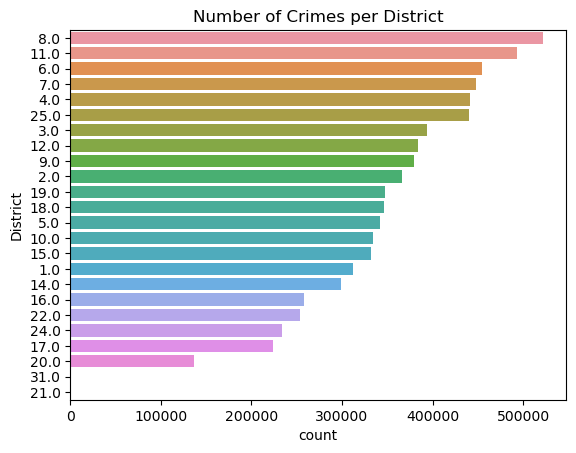

In [19]:
## Define the label order
label_order = df['District'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=df,
                   y='District',
                   order=label_order)

## Set the Title
ax.set_title('Number of Crimes per District');

# **Topic 2) Crimes Across the Years:**

## **Is the total number of crimes increasing or decreasing across the years?**

In [21]:
#create a new column called Year
df['Year'] = df.index.year

In [22]:
df.head(2)

Primary Type              Description  \
Date                                                          
2001-01-01 01:00:00          THEFT           $500 AND UNDER   
2001-01-01 13:00:00  OTHER OFFENSE  HARASSMENT BY TELEPHONE   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2001-01-01 01:00:00               STREET   False     False   911       9.0   
2001-01-01 13:00:00            RESIDENCE   False     False  2213      22.0   

                     Ward   Latitude  Longitude  Year  
Date                                                   
2001-01-01 01:00:00   NaN  41.798298 -87.692856  2001  
2001-01-01 13:00:00   NaN  41.707671 -87.666996  2001

In [23]:
df['Year'].value_counts()

2001    481697
2002    469963
2003    469931
2004    465306
2005    448243
2006    443554
2007    434318
2008    419154
2009    385392
2010    369389
2011    350536
2012    334602
2013    305782
2014    273199
2016    265956
2017    263664
2018    262470
2019    257776
2015    257416
2022    232140
2020    207180
2021    201935
2023    141317
Name: Year, dtype: int64

**Answer**: The total number of crimes appear to be **decreasing** each year.

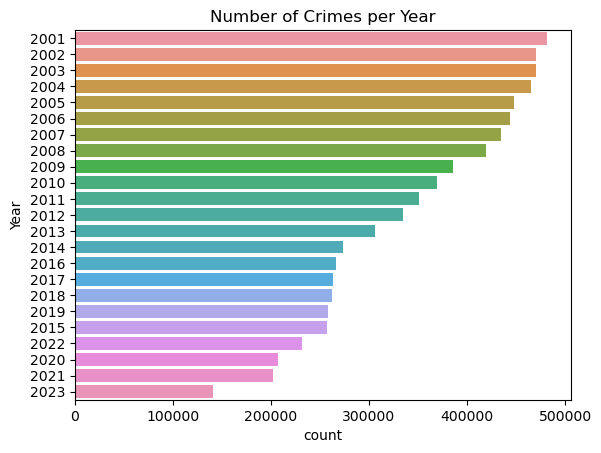

In [24]:
## Define the label order
label_order = df['Year'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=df,
                   y='Year',
                   order=label_order)

## Set the Title
ax.set_title('Number of Crimes per Year');

## **Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**

In [25]:
## Get # of crimes by Year
crimes_by_year = df.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1005
                   2002     978
                   2003     953
                   2004     774
                   2005     688
                           ... 
WEAPONS VIOLATION  2019    6335
                   2020    8412
                   2021    8944
                   2022    8692
                   2023    5022
Name: Year, Length: 716, dtype: int64

In [27]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

Primary Type  Year  # of Crimes
0                ARSON  2001         1005
1                ARSON  2002          978
2                ARSON  2003          953
3                ARSON  2004          774
4                ARSON  2005          688
..                 ...   ...          ...
711  WEAPONS VIOLATION  2019         6335
712  WEAPONS VIOLATION  2020         8412
713  WEAPONS VIOLATION  2021         8944
714  WEAPONS VIOLATION  2022         8692
715  WEAPONS VIOLATION  2023         5022

[716 rows x 3 columns]

Text(0.5, 1.0, 'Trend of Number of Crimes across years')

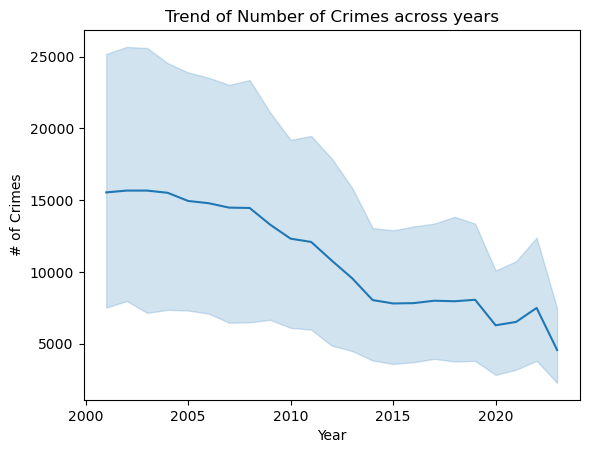

In [34]:
ax = sns.lineplot(data=plot_df, x='Year',y='# of Crimes')
ax.set_title('Trend of Number of Crimes across years')

We can see that overall there is a trend of fewer crimes occurring every year.

However, the error band is very wide and indicates there is likely a lot of variability between crimes.

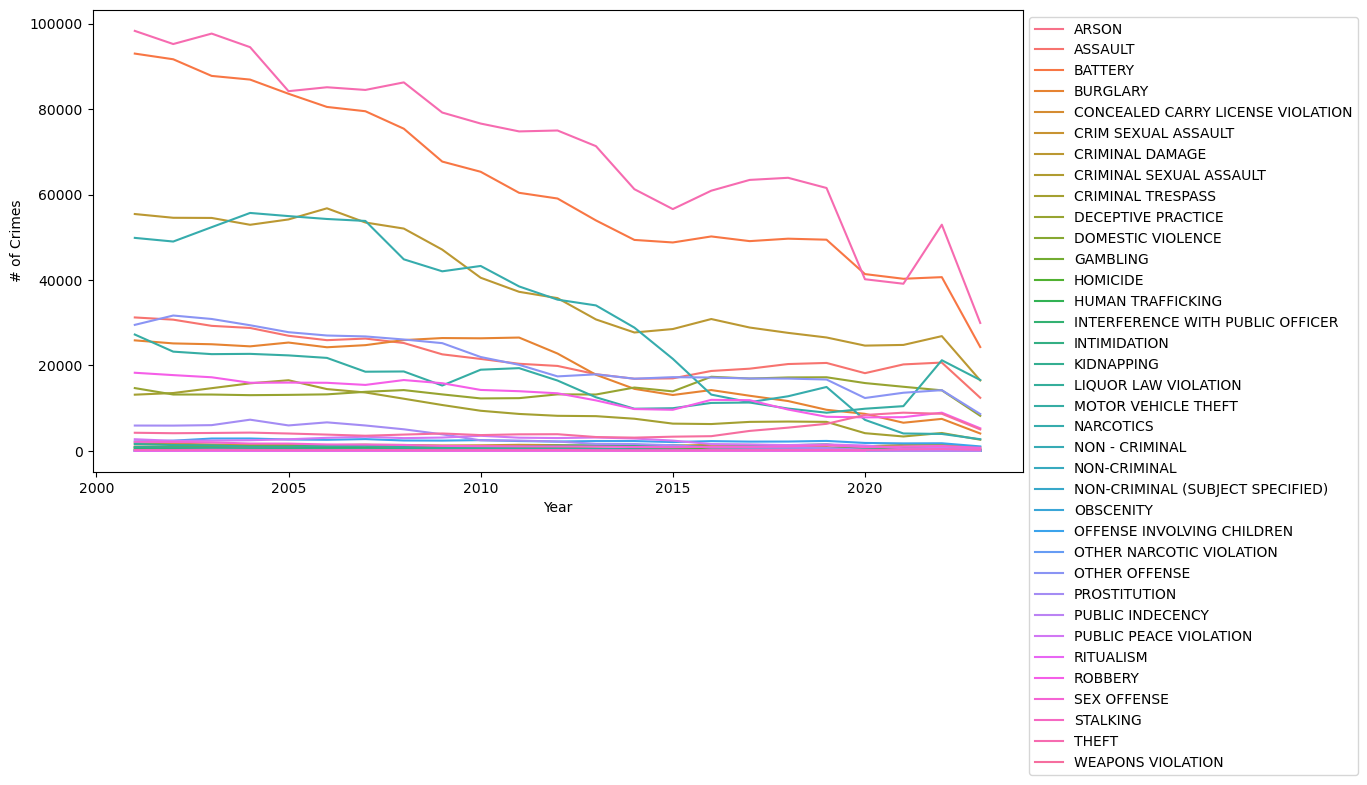

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='Year',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax)
ax.legend(bbox_to_anchor=[1,1]);

### **Catplot**

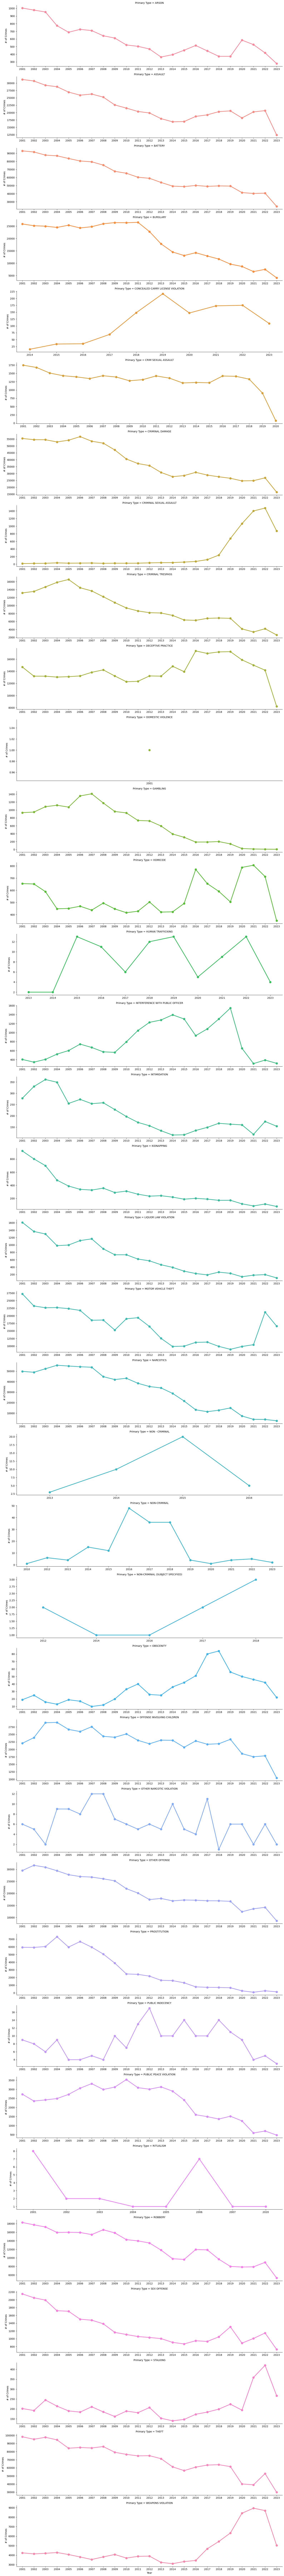

In [59]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=4, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=1,
               sharey=False, sharex=False)

**Answer**:

Yes, there are some Crime Types that increased over the years, such as:
- Criminal Sexual Assault
- Concealed Carry License Violations
- Weapons Violations
- Obscenity
- Interference with Public Officer
- Homicide

(NOTE: 2023 data is incomplete compared to other years because we are currently still in the middle of 2023.)

# **Topic 4) Comparing Months:**

## **What months have the most crime? What months have the least?**


In [62]:
#create a new column called Month
df['Month'] = df.index.month_name()

In [63]:
df.head(2)

Primary Type              Description  \
Date                                                          
2001-01-01 01:00:00          THEFT           $500 AND UNDER   
2001-01-01 13:00:00  OTHER OFFENSE  HARASSMENT BY TELEPHONE   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2001-01-01 01:00:00               STREET   False     False   911       9.0   
2001-01-01 13:00:00            RESIDENCE   False     False  2213      22.0   

                     Ward   Latitude  Longitude  Year    Month  
Date                                                            
2001-01-01 01:00:00   NaN  41.798298 -87.692856  2001  January  
2001-01-01 13:00:00   NaN  41.707671 -87.666996  2001  January

In [64]:
df['Month'].value_counts()

July         726616
August       700613
May          697365
June         694967
October      665140
September    659006
March        641437
April        639191
January      610297
November     598780
December     568018
February     539490
Name: Month, dtype: int64

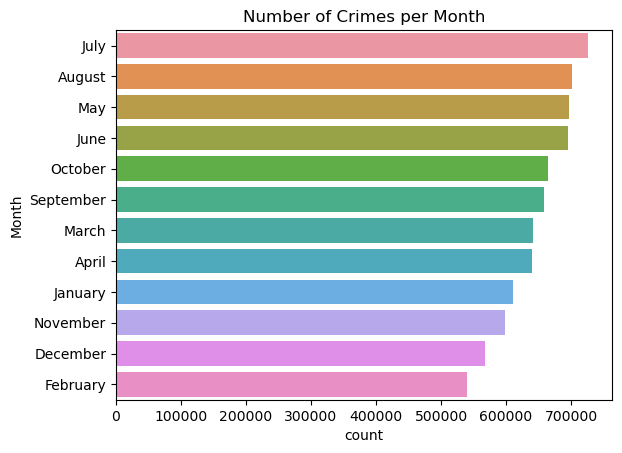

In [65]:
## Define the label order
label_order = df['Month'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=df,
                   y='Month',
                   order=label_order)

## Set the Title
ax.set_title('Number of Crimes per Month');

**Answer**: 
- Summer months (July / August / May / June) have the highest number of crimes. 
- Winter Months (January / November / December / February ) have the least number of crimes.

## **Are there any individual crimes that do not follow this pattern? If so, which crimes?**

In [69]:
#create a new column called Month_int which stores the integer value of the month number
df['Month_int'] = df.index.month

In [70]:
## Get # of crimes by Month
crimes_by_month = df.groupby('Primary Type')['Month_int'].value_counts().sort_index()
crimes_by_month

Primary Type       Month_int
ARSON              1             956
                   2             835
                   3            1135
                   4            1128
                   5            1282
                                ... 
WEAPONS VIOLATION  8            9822
                   9            9382
                   10           9118
                   11           7901
                   12           7360
Name: Month_int, Length: 415, dtype: int64

In [71]:
## convert to dataframe and reset_index()
plot_df_month = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df_month

Primary Type  Month_int  # of Crimes
0                ARSON          1          956
1                ARSON          2          835
2                ARSON          3         1135
3                ARSON          4         1128
4                ARSON          5         1282
..                 ...        ...          ...
410  WEAPONS VIOLATION          8         9822
411  WEAPONS VIOLATION          9         9382
412  WEAPONS VIOLATION         10         9118
413  WEAPONS VIOLATION         11         7901
414  WEAPONS VIOLATION         12         7360

[415 rows x 3 columns]

**Catplot**

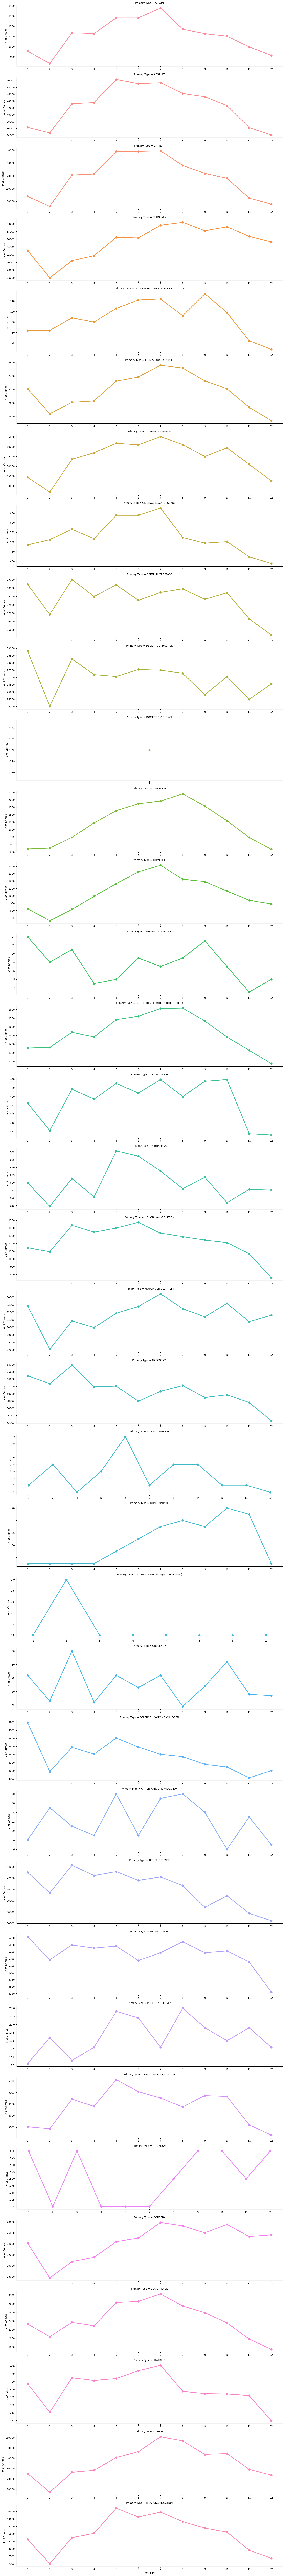

In [72]:
g = sns.catplot(data=plot_df_month, x='Month_int', y='# of Crimes',
                kind='point',aspect=4, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=1,
               sharey=False, sharex=False)

**Answer**:
The following individual crimes do not follow the pattern/trend regarding months with most number of total crimes and months with least number of total crimes.
- Deceptive Practice
- Human Trafficking
- Obscenity
- Offence involving children
- Ritualism
